In `galaxy properties by environments-updated.ipynb`, we see that there is a significant number of galaxies "outside" the main survey, especially for V$^2$/VIDE.  Is this a function of redshift, or something else?

In [10]:
from astropy.table import Table
from astropy.io import fits

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

# Data

In [19]:
data_filename = '../../../../data/NSA_v1_0_1_VAGC_vflag-V2-VF.fits'

hdu = fits.open(data_filename)
data = Table(hdu[1].data)
hdu.close()

## Just keep the main SDSS DR7 footprint

In [20]:
# When the catalog is the NSA, only keep those objects which were originally in the DR7 LSS
catalog_SDSS = data[data['IN_DR7_LSS'] == 1]

ra_boolean = np.logical_and(catalog_SDSS['RA'] > 110, catalog_SDSS['RA'] < 270)
catalog_north = catalog_SDSS[ra_boolean]

strip_boolean = np.logical_and.reduce([catalog_north['RA'] > 250, 
                                       catalog_north['RA'] < 269, 
                                       catalog_north['DEC'] > 51, 
                                       catalog_north['DEC'] < 67])
catalog_main = catalog_north[~strip_boolean]

## Separate galaxies by their LSS classifications

### $V^2$

In [21]:
wall_v2 = catalog_main['vflag_V2'] == 0
void_v2 = catalog_main['vflag_V2'] == 1
edge_v2 = catalog_main['vflag_V2'] == 2
out_v2 = catalog_main['vflag_V2'] == 9

In [22]:
print('Fraction of void galaxies in main survey:', np.sum(void_v2)/len(catalog_main))
print('Fraction of wall galaxies in main survey:', np.sum(wall_v2)/len(catalog_main))
print('Fraction of edge galaxies in main survey:', np.sum(edge_v2)/len(catalog_main))
print('Fraction of galaxies outside the main survey:', np.sum(out_v2)/len(catalog_main))

Fraction of void galaxies in main survey: 0.477324534043806
Fraction of wall galaxies in main survey: 0.20923381274692132
Fraction of edge galaxies in main survey: 0.051108947563774446
Fraction of galaxies outside the main survey: 0.2623327056454982


### VoidFinder

In [23]:
wall_vf = catalog_main['vflag_VF'] == 0
void_vf = catalog_main['vflag_VF'] == 1
edge_vf = catalog_main['vflag_VF'] == 2
out_vf = catalog_main['vflag_VF'] == 9

In [24]:
print('Fraction of void galaxies in main survey:', np.sum(void_vf)/len(catalog_main))
print('Fraction of wall galaxies in main survey:', np.sum(wall_vf)/len(catalog_main))
print('Fraction of edge galaxies in main survey:', np.sum(edge_vf)/len(catalog_main))
print('Fraction of galaxies outside the main survey:', np.sum(out_vf)/len(catalog_main))

Fraction of void galaxies in main survey: 0.1686750734083838
Fraction of wall galaxies in main survey: 0.47395678476137176
Fraction of edge galaxies in main survey: 0.09547268003272527
Fraction of galaxies outside the main survey: 0.26189546179751916


# Redshift distributions

<IPython.core.display.Javascript object>


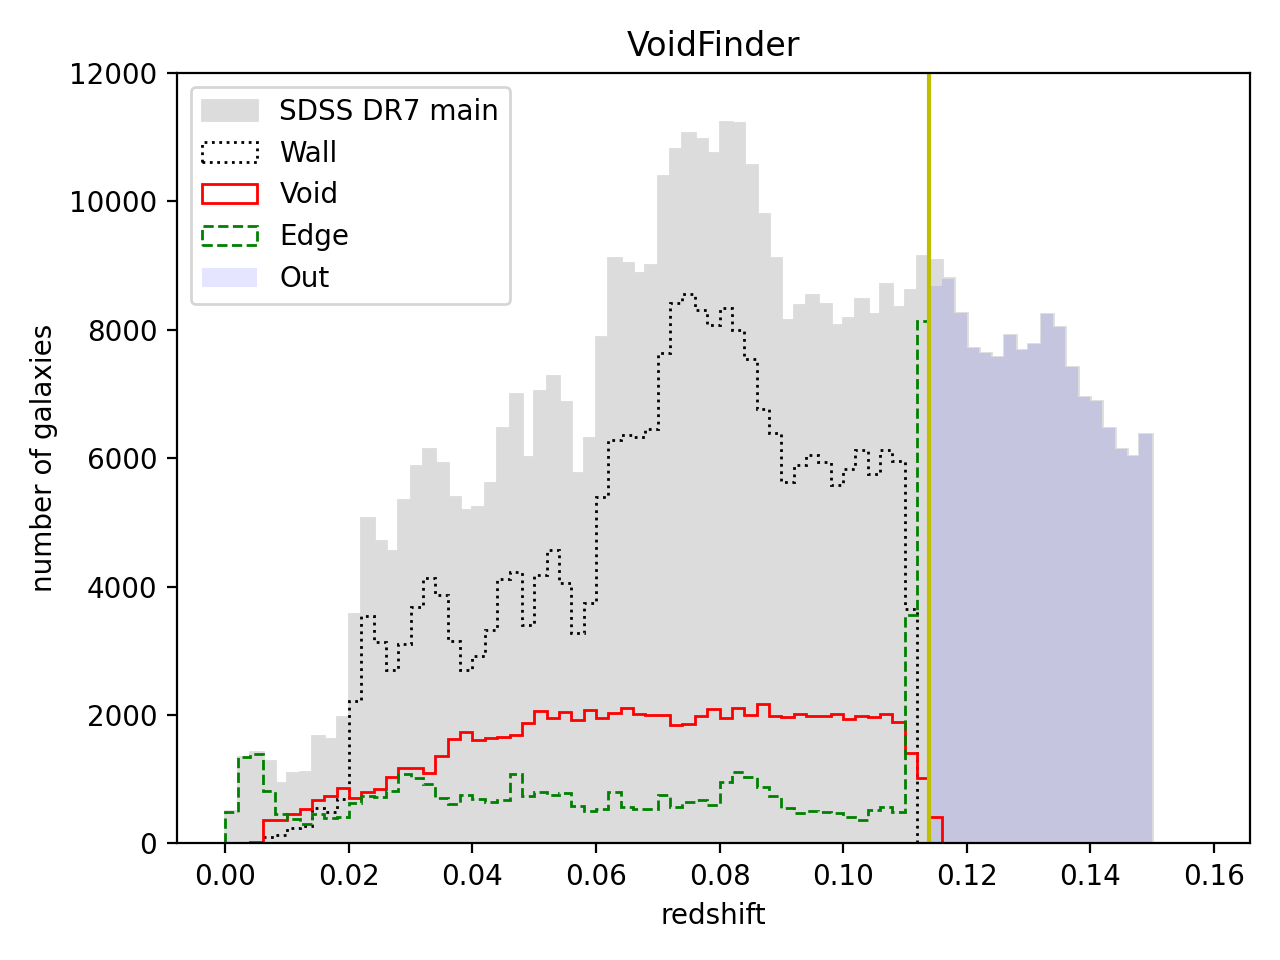

In [25]:
plt.figure(tight_layout=True)

z_bins = np.arange(0,0.16,0.002)

plt.hist(catalog_main['Z'], bins=z_bins, color='gainsboro', ec='gainsboro', label='SDSS DR7 main')
plt.hist(catalog_main['Z'][wall_vf], bins=z_bins, histtype='step', linestyle='dotted', color='k', label='Wall')
plt.hist(catalog_main['Z'][void_vf], bins=z_bins, histtype='step', color='r', label='Void')
plt.hist(catalog_main['Z'][edge_vf], bins=z_bins, histtype='step', color='g', linestyle='dashed', label='Edge')
plt.hist(catalog_main['Z'][out_vf], bins=z_bins, color='b', alpha=0.1, label='Out')

plt.vlines(0.114, 0, 30000, colors='y')

plt.ylim(0,12000)

plt.xlabel('redshift')
plt.ylabel('number of galaxies')

plt.title('VoidFinder')

plt.legend();

<IPython.core.display.Javascript object>


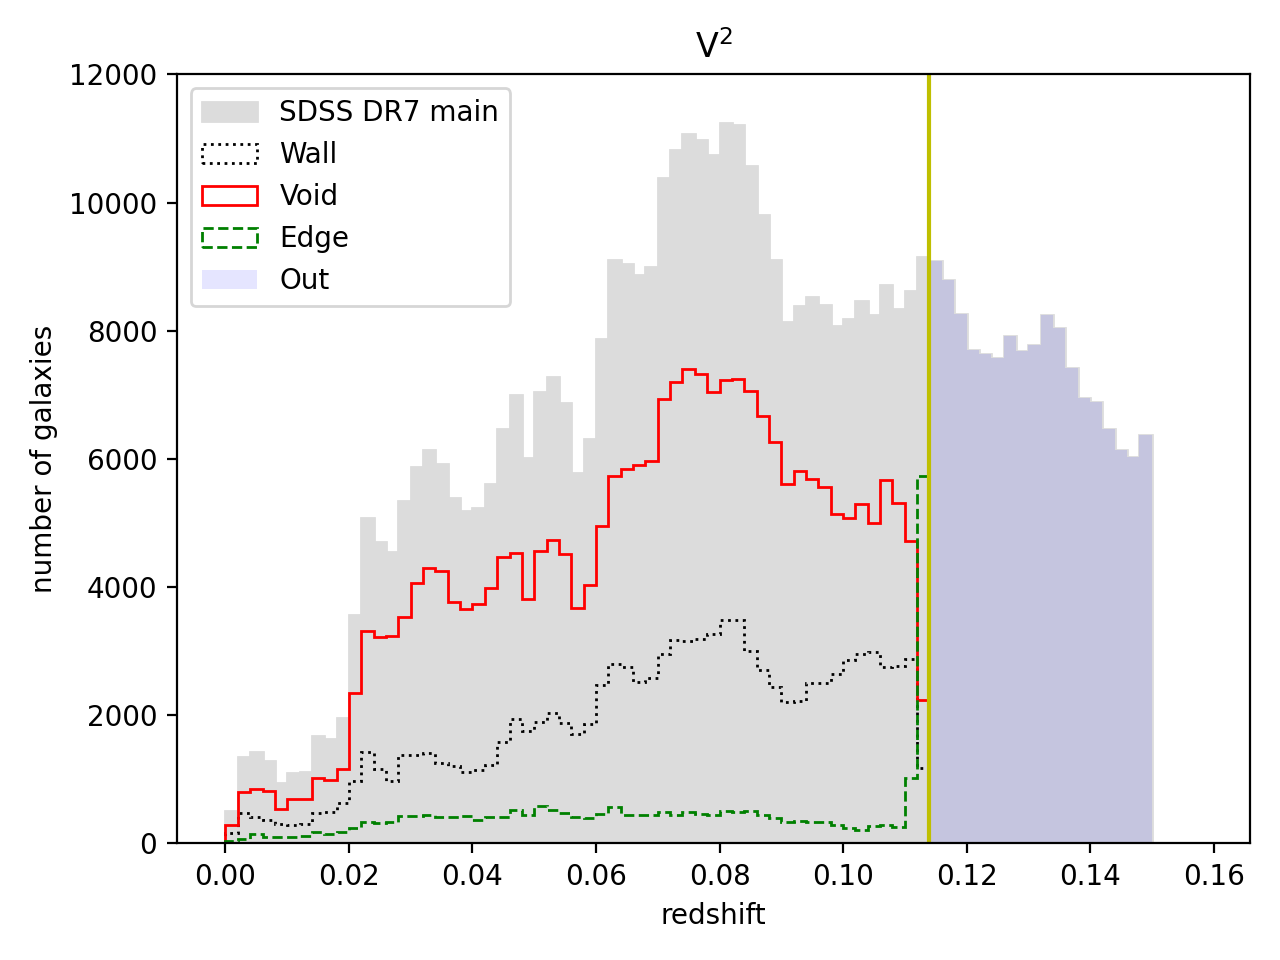

In [26]:
plt.figure(tight_layout=True)

z_bins = np.arange(0,0.16,0.002)

plt.hist(catalog_main['Z'], bins=z_bins, color='gainsboro', ec='gainsboro', label='SDSS DR7 main')
plt.hist(catalog_main['Z'][wall_v2], bins=z_bins, histtype='step', linestyle='dotted', color='k', label='Wall')
plt.hist(catalog_main['Z'][void_v2], bins=z_bins, histtype='step', color='r', label='Void')
plt.hist(catalog_main['Z'][edge_v2], bins=z_bins, histtype='step', color='g', linestyle='dashed', label='Edge')
plt.hist(catalog_main['Z'][out_v2], bins=z_bins, color='b', alpha=0.1, label='Out')

plt.vlines(0.114, 0, 30000, colors='y')

plt.ylim(0,12000)

plt.xlabel('redshift')
plt.ylabel('number of galaxies')

plt.title('V$^2$')

plt.legend();